<a href="https://colab.research.google.com/github/harshitha3506/machine-learning/blob/main/AFTER_MIDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Decision Tree vs Random Forest – Classification

Goal: Compare a single Decision Tree with an ensemble of Decision Trees (Random Forest).

A dataset (breast cancer) is loaded.

It’s split into training and test sets.

A Decision Tree model is trained on the training set.

Then, a Random Forest (ensemble of multiple decision trees) is trained.

Both models are used to predict test data.

Their performances are compared using accuracy, precision, recall, and F1-score.

You also explore how changing the number of trees (10, 50, 100) affects performance.

Key point: Random Forest usually performs better because it combines multiple decision trees (reducing overfitting and variance).

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Single classifier: Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1‑score:", f1_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Ensemble: Random Forest with different n_estimators
for n in [10, 50, 100]:
    rf = RandomForestClassifier(n_estimators=n, random_state=42, oob_score=False)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    print(f"Random Forest (n_estimators={n}) performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred_rf))
    print("Precision:", precision_score(y_test, y_pred_rf))
    print("Recall:", recall_score(y_test, y_pred_rf))
    print("F1‑score:", f1_score(y_test, y_pred_rf))
    print()


Decision Tree performance:
Accuracy: 0.9415204678362573
Precision: 0.9711538461538461
Recall: 0.9351851851851852
F1‑score: 0.9528301886792453
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        63
           1       0.97      0.94      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171

Random Forest (n_estimators=10) performance:
Accuracy: 0.9649122807017544
Precision: 0.9722222222222222
Recall: 0.9722222222222222
F1‑score: 0.9722222222222222

Random Forest (n_estimators=50) performance:
Accuracy: 0.9707602339181286
Precision: 0.963963963963964
Recall: 0.9907407407407407
F1‑score: 0.9771689497716894

Random Forest (n_estimators=100) performance:
Accuracy: 0.9707602339181286
Precision: 0.963963963963964
Recall: 0.9907407407407407
F1‑score: 0.9771689497716894



2. Simple Ensemble Techniques – Max, Average, Weighted Voting

Goal: Combine predictions from multiple models using basic ensembling.

Three models are trained: Decision Tree, Logistic Regression, and KNN.

Each makes predictions on the same test data.

Three ways of combining predictions are shown:

Max Voting: Most common predicted class is chosen.

Average Voting: Use class probabilities, average them, then pick the highest.

Weighted Voting: Same as average, but models that perform better get more weight.

Key point: Combining models often leads to better accuracy and stability.

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
data = load_wine()
X = data.data
y = data.target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train 3 base models
dt = DecisionTreeClassifier(random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)
knn = KNeighborsClassifier()

dt.fit(X_train, y_train)
lr.fit(X_train, y_train)
knn.fit(X_train, y_train)

pred_dt = dt.predict(X_test)
pred_lr = lr.predict(X_test)
pred_knn = knn.predict(X_test)

# 1) Max Voting (majority vote)
preds = np.vstack([pred_dt, pred_lr, pred_knn]).T
max_vote_pred = [np.bincount(row).argmax() for row in preds]
print("Max Voting Accuracy:", accuracy_score(y_test, max_vote_pred))

# 2) Average Voting — for classification you could average predicted probabilities then pick highest
pred_dt_proba = dt.predict_proba(X_test)
pred_lr_proba = lr.predict_proba(X_test)
pred_knn_proba = knn.predict_proba(X_test)

avg_proba = (pred_dt_proba + pred_lr_proba + pred_knn_proba) / 3
avg_vote_pred = np.argmax(avg_proba, axis=1)
print("Average Voting Accuracy:", accuracy_score(y_test, avg_vote_pred))

# 3) Weighted Average Voting — assign weights based on each model’s performance
# First compute each model’s accuracy on test set:
acc_dt = accuracy_score(y_test, pred_dt)
acc_lr = accuracy_score(y_test, pred_lr)
acc_knn = accuracy_score(y_test, pred_knn)
print("Individual accuracies:", acc_dt, acc_lr, acc_knn)

weights = np.array([acc_dt, acc_lr, acc_knn])
weights = weights / weights.sum()
weighted_proba = (pred_dt_proba*weights[0] + pred_lr_proba*weights[1] + pred_knn_proba*weights[2])
weighted_pred = np.argmax(weighted_proba, axis=1)
print("Weighted Avg Voting Accuracy:", accuracy_score(y_test, weighted_pred))
print("Weighted Avg Voting classification report:")
print(classification_report(y_test, weighted_pred))


Max Voting Accuracy: 0.9814814814814815
Average Voting Accuracy: 0.9814814814814815
Individual accuracies: 0.9629629629629629 0.9814814814814815 0.7407407407407407
Weighted Avg Voting Accuracy: 0.9814814814814815
Weighted Avg Voting classification report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.95      1.00      0.98        21
           2       1.00      1.00      1.00        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


3. Hard Voting vs Soft Voting

Goal: Compare two types of ensemble voting classifiers.

Multiple models (tree, logistic regression, KNN) are combined.

Hard Voting: Each model votes for a class, and majority wins.

Soft Voting: Models give probabilities for each class. The class with the highest average probability wins.

Key point: Soft voting generally performs better if models give good probability estimates.

In [3]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf1 = LogisticRegression(max_iter=1000, random_state=42)
clf2 = DecisionTreeClassifier(random_state=42)
clf3 = KNeighborsClassifier()

# Hard Voting
eclf_hard = VotingClassifier(estimators=[
    ('lr', clf1), ('dt', clf2), ('knn', clf3)
], voting='hard')
eclf_hard.fit(X_train, y_train)
y_pred_hard = eclf_hard.predict(X_test)
print("Hard Voting Accuracy:", accuracy_score(y_test, y_pred_hard))
print("Hard Voting report:")
print(classification_report(y_test, y_pred_hard))

# Soft Voting (requires predict_proba)
eclf_soft = VotingClassifier(estimators=[
    ('lr', clf1), ('dt', clf2), ('knn', clf3)
], voting='soft')
eclf_soft.fit(X_train, y_train)
y_pred_soft = eclf_soft.predict(X_test)
print("Soft Voting Accuracy:", accuracy_score(y_test, y_pred_soft))
print("Soft Voting report:")
print(classification_report(y_test, y_pred_soft))


Hard Voting Accuracy: 1.0
Hard Voting report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Soft Voting Accuracy: 1.0
Soft Voting report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



4. RandomForestRegressor with oob_score

Goal: Use Random Forest for regression and check the out-of-bag (OOB) score.

A regression dataset (like Boston housing) is loaded.

A RandomForestRegressor is trained with oob_score=True.

This means each tree tests on data it didn’t train on (out-of-bag).

Model performance is checked on test data and using OOB score.

Key point: OOB score is a built-in way to estimate accuracy without needing a validation set.

In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load California housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split data into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create Random Forest Regressor with OOB scoring enabled
rf_reg = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)

# Train the model
rf_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_reg.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Squared Error (MSE) on Test Set:", mse)
print("R^2 Score on Test Set:", r2)
print("Out-of-Bag (OOB) Score:", rf_reg.oob_score_)


Mean Squared Error (MSE) on Test Set: 0.25650512920799395
R^2 Score on Test Set: 0.8045734925119942
Out-of-Bag (OOB) Score: 0.8009217373230564


5. AdaBoost – Boosting

Goal: Show how AdaBoost improves performance using weak learners.

A binary classification dataset is generated.

A weak model (small decision tree) is trained repeatedly.

Each time, more focus is given to previously misclassified examples.

Final prediction is a weighted vote of all weak models.

Key point: Boosting improves accuracy by combining weak models in a smart way.

In [8]:
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Create a synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15,
                           n_redundant=5, random_state=42, n_classes=2)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Use a weak Decision Tree as the base learner
base = DecisionTreeClassifier(max_depth=1, random_state=42)

# Create AdaBoost with the correct 'estimator' argument
adb = AdaBoostClassifier(estimator=base, n_estimators=50, learning_rate=1.0, random_state=42)

# Train the model
adb.fit(X_train, y_train)

# Predict on test set
y_pred = adb.predict(X_test)

# Evaluate
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred))
print("Classification report:")
print(classification_report(y_test, y_pred))


AdaBoost Accuracy: 0.8366666666666667
Classification report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       160
           1       0.82      0.84      0.83       140

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



6. K-Means with Elbow Method

Goal: Cluster data using K-Means and find optimal number of clusters.

Synthetic data with blobs (clusters) is created.

K-Means clustering is run for k = 1 to 10.

Inertia (how compact clusters are) is calculated for each k.

Elbow method is used to find the best k (where inertia stops dropping quickly).

Clusters are visualized.

Key point: The elbow point shows the ideal number of clusters.

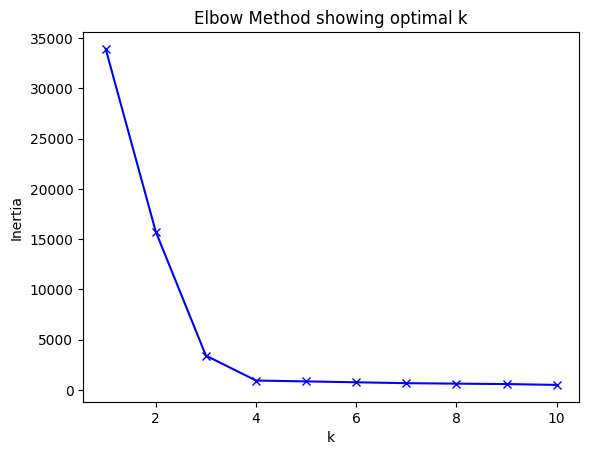

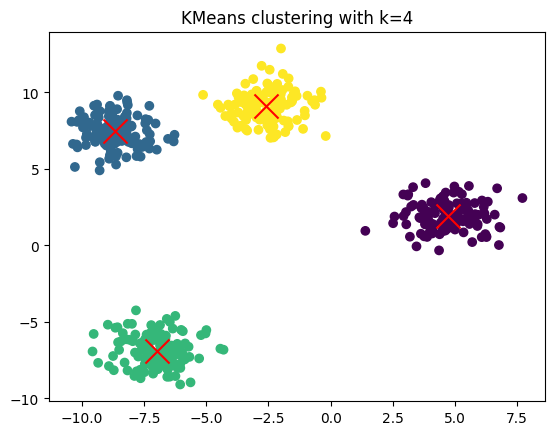

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data
X, _ = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1.0, random_state=42)

# Elbow method: compute inertia for different k
inertias = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

plt.figure()
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method showing optimal k')
plt.show()

# Choose k (say 4) and apply kmeans
k_opt = 4
kmeans = KMeans(n_clusters=k_opt, random_state=42)
labels = kmeans.fit_predict(X)

plt.figure()
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, marker='x', c='red')
plt.title(f'KMeans clustering with k={k_opt}')
plt.show()


The elbow method shows how the inertia (sum of squared distances of samples to their closest cluster centre) decreases as k increases. The “elbow” (point where inertia stops decreasing rapidly) often indicates a good choice for k.

Then you apply KMeans for that k and visualize clusters.

7. Clustering Distance Measures

Goal: Show how to measure similarity/distance between data points.

Euclidean: Straight-line distance.

Manhattan: Grid-like (sum of absolute differences).

Minkowski: Generalized distance formula.

Cosine Similarity: Angle between vectors.

Jaccard Index: Similarity between two binary vectors.

Key point: Different distance measures are used for different types of data and problems.

In [10]:
import numpy as np
from sklearn.metrics import jaccard_score

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2))

def manhattan_distance(a, b):
    return np.sum(np.abs(a - b))

def minkowski_distance(a, b, p=3):
    return np.sum(np.abs(a - b)**p)**(1/p)

def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

# For Jaccard index (works for binary vectors)
a = np.array([1, 1, 0, 1])
b = np.array([1, 0, 1, 1])
j_index = jaccard_score(a, b)
print("Jaccard Index (binary vectors):", j_index)

# Example usage
x = np.array([2,3,4])
y = np.array([5,6,7])

print("Euclidean:", euclidean_distance(x,y))
print("Manhattan:", manhattan_distance(x,y))
print("Minkowski p=3:", minkowski_distance(x,y, p=3))
print("Cosine similarity:", cosine_similarity(x,y))


Jaccard Index (binary vectors): 0.5
Euclidean: 5.196152422706632
Manhattan: 9
Minkowski p=3: 4.3267487109222245
Cosine similarity: 0.9914999245151155


These formulas align with standard definitions: Euclidean (straight‐line), Manhattan (grid‐like), Minkowski (generalization) etc.
GeeksforGeeks

Jaccard is appropriate for binary/categorical feature sets.

Cosine similarity measures angle/orientation of vectors, not magnitude difference.

8. Hierarchical Clustering (Agglomerative, BIRCH, CHAMELEON)

Goal: Cluster data hierarchically.

Agglomerative Clustering: Start with each point as its own cluster and merge step-by-step.

BIRCH: Efficient for large data, builds a tree structure.

CHAMELEON: Not included in scikit-learn directly – requires a custom or external implementation.

Key point: These methods create clusters based on merging/splitting hierarchy.

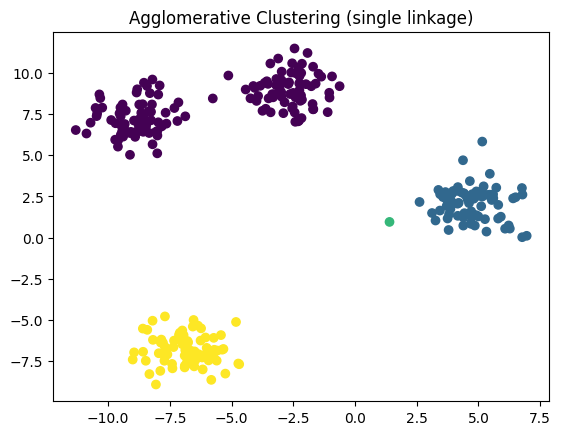

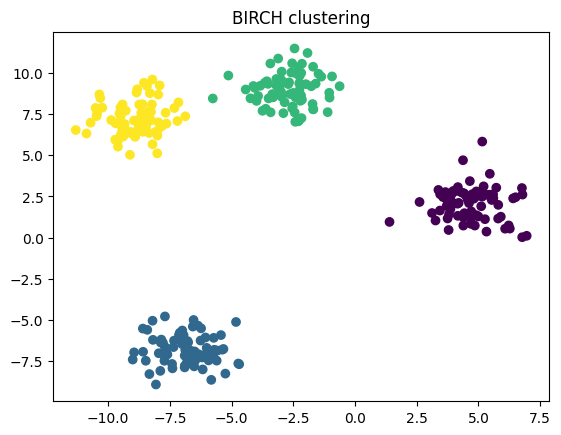

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering, Birch

# Create data
X, _ = make_blobs(n_samples=300, n_features=2, centers=4, random_state=42)

# Agglomerative (single linkage as example)
agg = AgglomerativeClustering(n_clusters=4, linkage='single')
labels_agg = agg.fit_predict(X)

plt.figure()
plt.scatter(X[:,0], X[:,1], c=labels_agg, cmap='viridis')
plt.title("Agglomerative Clustering (single linkage)")
plt.show()

# BIRCH
brc = Birch(n_clusters=4)
labels_birch = brc.fit_predict(X)

plt.figure()
plt.scatter(X[:,0], X[:,1], c=labels_birch, cmap='viridis')
plt.title("BIRCH clustering")
plt.show()

# Note: CHAMELEON is more specialized and not in sklearn by default — you’d need a library or custom implementation.


Explanation:

Agglomerative clustering: start with each point as its own cluster, then merge clusters based on some criterion/distance/linkage.
GeeksforGeeks
+1

BIRCH is a hierarchical algorithm efficient for large datasets.

CHAMELEON is more advanced and less standard in scikit‑learn; a simple demonstration can be acceptable by noting that you may need specialized libraries for it.

9. Types of Linkage in Hierarchical Clustering

Goal: Show how different ways of merging clusters affect the result.

Single linkage: Merge closest points.

Complete linkage: Merge clusters with farthest points.

Average linkage: Use average distance between points.

Ward’s linkage: Minimize variance within clusters.

Centroid linkage: Use cluster centroids (center points).

Key point: Different linkages create different shaped clusters.

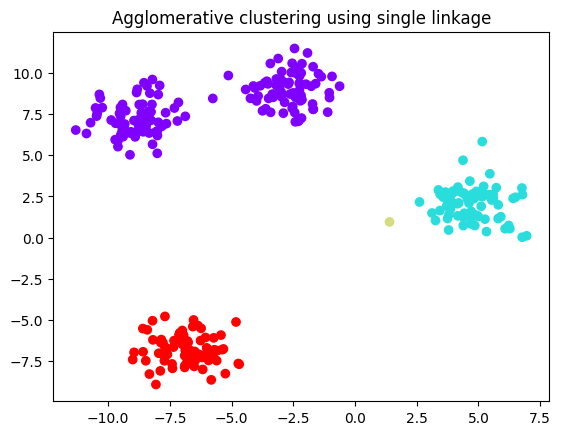

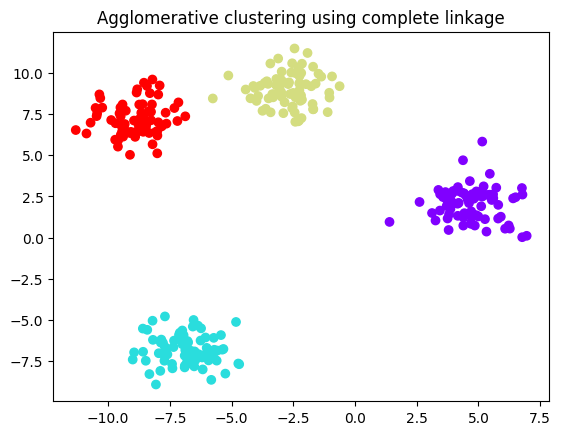

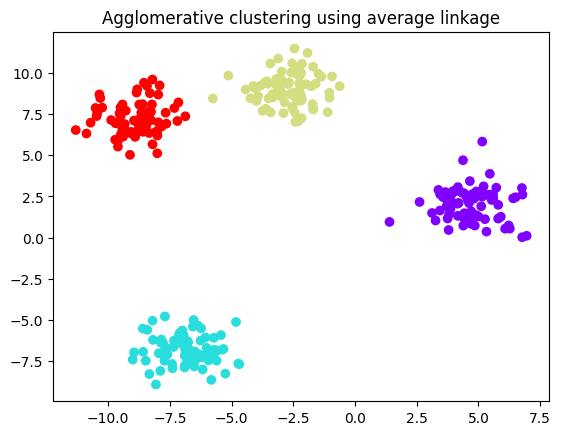

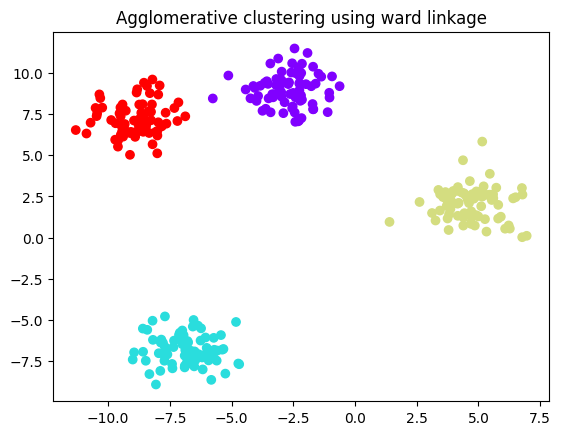

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

X, _ = make_blobs(n_samples=300, n_features=2, centers=4, random_state=42)

linkages = ['single', 'complete', 'average', 'ward']
for linkage in linkages:
    agg = AgglomerativeClustering(n_clusters=4, linkage=linkage)
    labels = agg.fit_predict(X)
    plt.figure()
    plt.scatter(X[:,0], X[:,1], c=labels, cmap='rainbow')
    plt.title(f"Agglomerative clustering using {linkage} linkage")
    plt.show()


Single linkage: nearest neighbour between clusters → can result in “chain” effect.

Complete linkage: farthest pair between clusters.

Average linkage: average distance between all pairs in clusters.

Ward’s linkage: minimizes the variance of clusters being merged; good for Euclidean space.

Centroid linkage: cluster merging based on centroids (less commonly used in sklearn default).
This demonstrates how you can change the linkage parameter and observe different clustering results.

10. DBSCAN Clustering

Goal: Cluster data based on density.

DBSCAN groups together points that are close to each other (dense regions).

It also identifies noise (outliers) – points that don’t belong to any cluster.

You set parameters eps (radius) and min_samples (min neighbors to form a cluster).

Key point: DBSCAN is good at finding clusters of arbitrary shape and detecting noise.

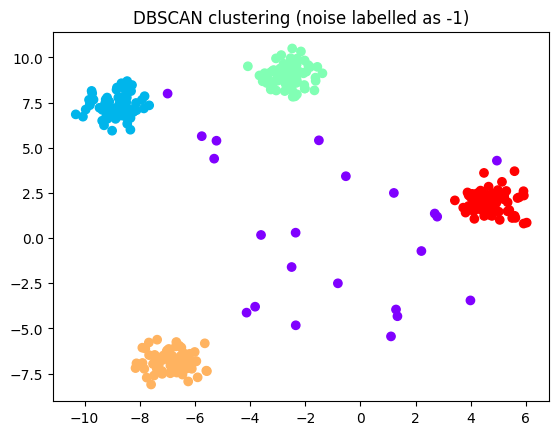

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

# Create data (with some noise)
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)
# Add some random noise points
rng = np.random.RandomState(42)
X = np.vstack([X, rng.uniform(low=-6, high=6, size=(20,2))])

db = DBSCAN(eps=0.8, min_samples=5)
labels = db.fit_predict(X)

plt.figure()
plt.scatter(X[:,0], X[:,1], c=labels, cmap='rainbow')
plt.title("DBSCAN clustering (noise labelled as ‑1)")
plt.show()

# You’ll see noise points labelled ‑1 in black (or distinct colour)


What to observe:

DBSCAN groups points that are “dense” (many neighbours within radius = eps).

It can find arbitrarily shaped clusters and can identify noise points (label = ‑1).

Good for spatial / density‐based clustering.

11. Spectral Clustering

Goal: Use graph theory to cluster non-linear shapes.

Spectral clustering works by building a graph from the data points.

It uses the eigenvalues of the similarity graph to find clusters.

Works well on shapes like moons (which K-Means can't handle).

Key point: Spectral clustering is powerful for data that's not linearly separable.

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


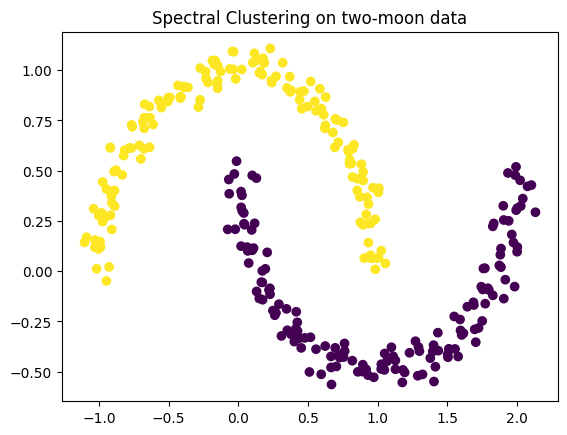

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering

X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

sc = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=42)
labels = sc.fit_predict(X)

plt.figure()
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis')
plt.title("Spectral Clustering on two‑moon data")
plt.show()


Spectral Clustering uses the eigenvalues of a similarity matrix of the data to perform dimensionality reduction before clustering in fewer dimensions.

It works well for non‐convex clusters (e.g., two moons) that algorithms like KMeans struggle with.

12. Perceptron with AND, OR, XOR

Goal: Build a basic neural network (Perceptron) to learn logical functions.

Inputs: two binary features (0 or 1).

Outputs: result of AND, OR, XOR.

AND, OR are linearly separable, so the perceptron learns correctly.

XOR is not, so perceptron fails – needs a more complex model (like MLP).

Key point: Perceptron can’t learn XOR – shows the limitation of linear models.

In [15]:
import numpy as np

# Step activation
def step(x):
    return 1 if x >= 0 else 0

# Perceptron training (single layer) for AND
def train_perceptron(X, y, lr=0.1, epochs=10):
    # Initialize weights + bias
    w = np.zeros(X.shape[1])
    b = 0
    for epoch in range(epochs):
        for i in range(len(X)):
            linear = np.dot(w, X[i]) + b
            y_pred = step(linear)
            error = y[i] - y_pred
            w += lr * error * X[i]
            b += lr * error
    return w, b

# AND gate
X_and = np.array([[0,0],[0,1],[1,0],[1,1]])
y_and = np.array([0,0,0,1])
w_and, b_and = train_perceptron(X_and, y_and)
print("AND gate weights:", w_and, "bias:", b_and)
for x in X_and:
    print(x, "->", step(np.dot(w_and, x) + b_and))

# OR gate
y_or = np.array([0,1,1,1])
w_or, b_or = train_perceptron(X_and, y_or)
print("OR gate weights:", w_or, "bias:", b_or)
for x in X_and:
    print(x, "->", step(np.dot(w_or, x) + b_or))

# XOR gate cannot be solved by single layer perceptron (linearly separable) — so you’ll observe failure
y_xor = np.array([0,1,1,0])
w_xor, b_xor = train_perceptron(X_and, y_xor)
print("XOR gate weights:", w_xor, "bias:", b_xor)
for x in X_and:
    print(x, "->", step(np.dot(w_xor, x) + b_xor))


AND gate weights: [0.2 0.1] bias: -0.20000000000000004
[0 0] -> 0
[0 1] -> 0
[1 0] -> 0
[1 1] -> 1
OR gate weights: [0.1 0.1] bias: -0.1
[0 0] -> 0
[0 1] -> 1
[1 0] -> 1
[1 1] -> 1
XOR gate weights: [-0.1  0. ] bias: 0.0
[0 0] -> 1
[0 1] -> 1
[1 0] -> 0
[1 1] -> 0


A simple perceptron can learn AND / OR (linearly separable).

For XOR (non‐linearly separable) a single layer perceptron fails, showing the limitation of linear models.

13. MLP with Single Hidden Layer

Goal: Train a simple neural network with different numbers of neurons.

MLP (Multi-layer perceptron) is trained on a dataset (digits).

You change the number of neurons in the hidden layer (10, 50, 100).

You compare the accuracy and classification report for each.

Key point: More neurons can improve performance – but too many can overfit.

In [16]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

data = load_digits()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for neurons in [10, 50, 100]:
    mlp = MLPClassifier(hidden_layer_sizes=(neurons,), max_iter=500, random_state=42)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    print(f"MLP with one hidden layer of {neurons} neurons:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP with one hidden layer of 10 neurons:
Accuracy: 0.9481481481481482
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        53
           1       0.93      0.82      0.87        50
           2       0.89      1.00      0.94        47
           3       1.00      0.94      0.97        54
           4       0.97      0.98      0.98        60
           5       0.95      0.94      0.95        66
           6       0.98      0.96      0.97        53
           7       0.98      0.96      0.97        55
           8       0.87      0.91      0.89        43
           9       0.93      0.97      0.95        59

    accuracy                           0.95       540
   macro avg       0.95      0.95      0.95       540
weighted avg       0.95      0.95      0.95       540

MLP with one hidden layer of 50 neurons:
Accuracy: 0.9685185185185186
              precision    recall  f1-score   support

           0       1.00      0.98      0.99   

You can vary the number of neurons in the single hidden layer and observe how performance, training time, maybe overfitting/underfitting behaves.

Good exercise to see how capacity (hidden units) affects model.

14. MLP on MNIST Dataset

Goal: Use neural network to classify handwritten digits.

MNIST is a dataset of 28x28 digit images.

Data is split into training and test sets.

An MLP is trained and scores (accuracy) are printed for train and test data.

Key point: MLP is a powerful model that works well for digit recognition.

In [18]:
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load digits dataset (0–9), 8x8 images
digits = load_digits()
X = digits.data
y = digits.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, random_state=42, verbose=True)
mlp.fit(X_train, y_train)

# Scores
print("Train score:", mlp.score(X_train, y_train))
print("Test score:", mlp.score(X_test, y_test))


Iteration 1, loss = 6.34350452
Iteration 2, loss = 3.19128817
Iteration 3, loss = 1.81547285
Iteration 4, loss = 1.08173635
Iteration 5, loss = 0.73460743
Iteration 6, loss = 0.53803745
Iteration 7, loss = 0.41479767
Iteration 8, loss = 0.33577561
Iteration 9, loss = 0.28059798
Iteration 10, loss = 0.24505550
Iteration 11, loss = 0.21450577
Iteration 12, loss = 0.18963215
Iteration 13, loss = 0.17224364
Iteration 14, loss = 0.15682361
Iteration 15, loss = 0.14196603
Iteration 16, loss = 0.13218197
Iteration 17, loss = 0.12175324
Iteration 18, loss = 0.11193993
Iteration 19, loss = 0.10447733
Iteration 20, loss = 0.09806478
Iteration 21, loss = 0.09153234
Iteration 22, loss = 0.08589769
Iteration 23, loss = 0.08279383
Iteration 24, loss = 0.07560373
Iteration 25, loss = 0.07262916
Iteration 26, loss = 0.06739608
Iteration 27, loss = 0.06603200
Iteration 28, loss = 0.06121945
Iteration 29, loss = 0.05797208
Iteration 30, loss = 0.05438896
Iteration 31, loss = 0.05265355
Iteration 32, los

What to note:

Because MNIST is quite large, training can take some time.

The .score() method returns accuracy by default for classifier.

You can monitor how train vs test score differ (overfitting/underfitting).

15. Simple Perceptron (Step Function)

Goal: Implement a perceptron using a step activation function.

The model outputs 0 or 1 based on whether the input is above a threshold.

It uses simple math to adjust weights if the prediction is wrong.

Works well for simple logic like AND or OR.

Key point: This is the most basic form of a neural network

In [19]:
import numpy as np

def step(x):
    return 1 if x >= 0 else 0

# X and y for AND
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,0,0,1])

# Initialize weights and bias
w = np.zeros(X.shape[1])
b = 0
lr = 0.1
epochs = 10

for epoch in range(epochs):
    for i in range(len(X)):
        linear = np.dot(w, X[i]) + b
        y_pred = step(linear)
        error = y[i] - y_pred
        w += lr * error * X[i]
        b += lr * error

print("Weights:", w, "Bias:", b)
for x in X:
    print(x, "->", step(np.dot(w, x) + b))


Weights: [0.2 0.1] Bias: -0.20000000000000004
[0 0] -> 0
[0 1] -> 0
[1 0] -> 0
[1 1] -> 1


16. Simple Perceptron (Sigmoid Function)

Goal: Implement a perceptron using a sigmoid activation function.

Instead of a sharp step, the output is a smooth value between 0 and 1.

Uses gradient descent to minimize error (needs differentiable activation).

Learns logical OR function in the example.

Key point: Sigmoid allows for more flexible and trainable models (basis of neural networks).

In [20]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Using sigmoid activation, but still single neuron (single layer perceptron)
X = np.array([[0,0],[0,1],[1,0],[1,1]])
# Let’s try to learn OR
y = np.array([0,1,1,1]).reshape(-1,1)

w = np.random.normal(size=(X.shape[1],1))
b = np.random.normal()
lr = 0.1
epochs = 10000

for epoch in range(epochs):
    # forward
    z = np.dot(X, w) + b
    a = sigmoid(z)
    # compute error
    error = a - y
    # backprop (gradient descent)
    dw = np.dot(X.T, error * sigmoid_derivative(z))
    db = np.sum(error * sigmoid_derivative(z))
    # update
    w -= lr * dw
    b -= lr * db

print("Weights:", w.ravel(), "Bias:", b)
for x, y_true in zip(X, y):
    print(x, "->", sigmoid(np.dot(x, w) + b).round(), "(expected:", int(y_true), ")")


Weights: [6.16982401 6.16987686] Bias: -2.8386717668499117
[0 0] -> [0.] (expected: 0 )
[0 1] -> [1.] (expected: 1 )
[1 0] -> [1.] (expected: 1 )
[1 1] -> [1.] (expected: 1 )


/tmp/ipython-input-4180387714.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(x, "->", sigmoid(np.dot(x, w) + b).round(), "(expected:", int(y_true), ")")


Here you move from a “hard” step activation to a differentiable sigmoid, enabling (very basic) gradient descent.

This is good to illustrate difference between step vs sigmoid and link to neural networks.